In [1]:
# 1)-Import necessary libraries
import pandas as pd
import random
import os
import statistics as st
import math

In [2]:
%config IPCompleter.greedy=True


In [3]:

current_folder = os.getcwd()
print(current_folder)

/work


In [4]:
# 2)-Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
file_list = os.listdir('./data/CollegeScorecard_Raw_Data')
file_list

['MERGED2015_16_PP.csv',
 '.DS_Store',
 'MERGED2013_14_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'data.yaml',
 'MERGED2011_12_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2004_05_PP.csv',
 'Crosswalks.zip',
 'MERGED2005_06_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2012_13_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2014_15_PP.csv']

In [5]:
# 3)-Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
df = pd.read_csv("./data/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv")
df.shape

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,1351,1365,1377,1378,1407,1408,1411,1426,1431,1432,1433,1445,1446,1447,1537,1538,1539,1540,1541,1542,1547,1548,1549,1553,1554,1559,1560,1561,1562,1563,1567,1568,1571,1572,1573,1574,1606,1609,1610,1611,1613,1614,1615,1616,1636,1637,1711,1723,1724,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(7217, 1986)

In [6]:
# 4)-Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information
df = pd.read_csv("./data/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv",usecols=['INSTNM','TUITIONFEE_IN'])
df.head()

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0


In [7]:
# 5)-Find out how many observations have missing value.
df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2928
dtype: int64

In [8]:
# 6)- Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna() 
df.shape

(4289, 2)

In [9]:
# 7)- Find out how many observations have 0 tution.
zero_tuition = df[df['TUITIONFEE_IN']==0]
zero_tuition.shape

(5, 2)

In [10]:
# 8) - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df = df[df['TUITIONFEE_IN']!=0]
df.shape

(4284, 2)

In [11]:
# 9)- Calculate and display the mean (average) of the tuitions of all the remaining observations
average_fee = st.mean(df['TUITIONFEE_IN'])
print('Average Tuition Fees ', average_fee )

Average Tuition Fees  12067.689775910365


In [12]:
# 10)- Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.
row = df.sample() 
row

,INSTNM,TUITIONFEE_IN
4011,North Lake College,1230.0


In [13]:
# 11)-Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
print(row['TUITIONFEE_IN']-average_fee)

4011   -10837.689776
Name: TUITIONFEE_IN, dtype: float64


In [14]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
# 13)-Randomly select 20 observations, display the tuition of these observation.
random_observations = df.sample(20)
random_observations

,INSTNM,TUITIONFEE_IN
4229,Southside Virginia Community College,2856.0
2987,Southwestern Community College,1465.0
5232,Argosy University-The Art Institute of Califor...,24294.0
1,Alabama A & M University,4692.0
3804,Cumberland University,17430.0
6193,University of Phoenix-Central Valley Campus,10512.0
3008,Dickinson State University,5249.0
4303,Northwest University,21994.0
7101,Keiser University-Sarasota,14176.0
5109,Colorado Technical University-Sioux Falls,10245.0


In [15]:
# 14)-Calculate and display the mean tuition of these 20 observations
mean_random_obs = st.mean(random_observations['TUITIONFEE_IN'])
print('Average Tuition fee of Random Observations :', mean_random_obs)

Average Tuition fee of Random Observations : 10260.8


In [16]:
# 15)-Calculate  the difference between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
# 16)- - Repeat 13 to 15 several times and get the feel of the size of the difference in means 

mean_diff = mean_random_obs-average_fee
print('Difference between Random observations and previous observations ',mean_diff)

Difference between Random observations and previous observations  -1806.8897759103656


In [17]:
# 17)-write function Code here
def mean_difference(x,y):
    random_observations = y.sample(x)
    mean_random_obs = st.mean(random_observations['TUITIONFEE_IN'])
    total_mean = st.mean(y['TUITIONFEE_IN'])
    return abs(mean_random_obs-total_mean)

In [18]:
# 18)- Test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
random_sample = 30
print('Mean of random sample: ',mean_difference(30,df))

Mean of random sample:  2033.656442577032


In [19]:

# 19)- Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = [i for i in range(1,51)]
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [20]:
# 20)- Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

def calculateMeanDifference(sample_sizes,df):
    means_diff = []
    population_mean = st.mean(df['TUITIONFEE_IN'])
    for i in sample_sizes:
        sample_df = df.sample(i)
        sample_mean = st.mean(sample_df['TUITIONFEE_IN'])
        means_diff.append(abs(sample_mean-population_mean))
    return means_diff
    
print('Means_diff List after the loop :')
means_diff = calculateMeanDifference(sample_sizes,df)
print(means_diff)

Means_diff List after the loop :
[2432.310224089635, 7059.310224089635, 1728.310224089635, 2101.310224089635, 1521.9102240896354, 369.47689075630115, 5438.310224089635, 901.8102240896351, 4163.245331465921, 359.7897759103653, 157.598866819455, 2008.9768907563011, 1505.5409933204046, 3376.689775910365, 2356.489775910364, 1873.310224089635, 4704.925070028012, 767.7453314659197, 2368.5733819843717, 1878.5397759103653, 2456.7373949579833, 3486.417048637637, 2188.005876263549, 1198.689775910365, 789.9502240896345, 2013.4256087050198, 2415.6527388733284, 1846.1316526610644, 237.4136723654974, 551.1231092436974, 3571.1811918315707, 1320.127275910365, 1275.7344665138771, 8.280812324928775, 184.1754901960794, 1012.5324463118577, 819.6627488833383, 810.5581969629966, 1177.5872118078005, 325.01477591036564, 412.0907118945124, 51.3326330532218, 698.9381310663794, 181.39432136491087, 2559.354668534079, 1665.798471562539, 1873.413180165684, 2113.747724089635, 642.0653261304506, 310.53022408963443]


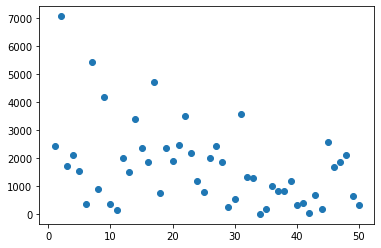

In [21]:

# 21)- Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
import matplotlib.pyplot as plt
plt.scatter(sample_sizes,means_diff)

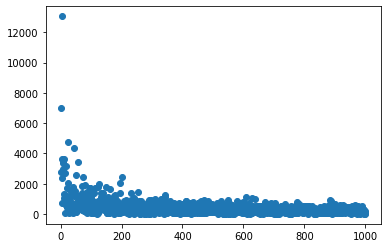

In [22]:
# 22)- repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_sizes = [i for i in range(1,1001)]
means_diff = calculateMeanDifference(sample_sizes,df)
plt.scatter(sample_sizes,means_diff)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=228dab0f-cd07-447f-a16a-a93d7558780d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>